Notebooks adaptados y traducidos a partir de los tutoriales de código abierto 
utilizados en las competencias virtuales de los últimos 2 años
Yamamoto, T., Terada, K., Ochiai, A. et al. Development of Human Support Robot as the research platform of a domestic mobile manipulator. Robomech J 6, 4 (2019). https://doi.org/10.1186/s40648-019-0132-3

Por favor Consulte los originales en inglés y Japonés en https://github.com/hsr-project/hsrb_robocup_dspl_docker


Adaptado al español por Laboratorio BioRobótica UNAM
Oscar Fuentes


Para correr este notebook debe tenerse familiaridad con términos de ROS como tópicos, listeners, publishers, mensajes etc.


In [ ]:
#ROS NOETIC UBUNTU 20 PYTHON3  
#ROS MELODIC UBUNTU 18 Python2   (iKERNEL)

In [ ]:
import math
import rospy
import time
from sensor_msgs.msg import LaserScan, PointCloud2 ,Image

ModuleNotFoundError: ignored

Introducimos ahora dos nuevos tipos de mensajes relevantes. Imagen  y nube de puntos, Ambos mensajes propios de ros, 
se muestran algunas librerías que hacen más fácil su utilización en Python
https://www.ros.org/
http://wiki.ros.org/ros_numpy
http://wiki.ros.org/cv_bridge


In [2]:
import numpy as np
import ros_numpy



ModuleNotFoundError: ignored

Es recomendable revisar la documnetación porpia de ROS al respecto, así como la de algunos paquetes auxiliares como ros_numpy y cv_bridge

La manipulación de imáges es realizada con open_cv. También es muy recomendable revisar su documentación. 
https://opencv.org/

In [1]:
! rosmsg info Image

/bin/bash: rosmsg: command not found


In [ ]:
! rosmsg info PointCloud2

[sensor_msgs/PointCloud2]:
std_msgs/Header header
  uint32 seq
  time stamp
  string frame_id
uint32 height
uint32 width
sensor_msgs/PointField[] fields
  uint8 INT8=1
  uint8 UINT8=2
  uint8 INT16=3
  uint8 UINT16=4
  uint8 INT32=5
  uint8 UINT32=6
  uint8 FLOAT32=7
  uint8 FLOAT64=8
  string name
  uint32 offset
  uint8 datatype
  uint32 count
bool is_bigendian
uint32 point_step
uint32 row_step
uint8[] data
bool is_dense



In [3]:
rospy.init_node('xtion_rgbd_notebook_node')    ### Conectamos/creamos nuestro nodo

NameError: ignored

El objetivo de este notebook es obtener y procesar la información que se recibe del sensor de visión. El XTION, 
obtiene información RGB que publica en el tópico : en froma de mensajes tipo Image

Simultáneamente , es publicado en el tópico "/hsrb/head_rgbd_sensor/depth_registered/rectified_points"
, información de la nube de puntos, en forma de un mensaje tipo  PointCloud2

In [4]:
class RGBD():
    

    def __init__(self):
        self._cloud_sub = rospy.Subscriber(
            "/hsrb/head_rgbd_sensor/depth_registered/rectified_points",
            PointCloud2, self._cloud_cb)
        self._points_data = None
        self._image_data = None
        
    def _cloud_cb(self, msg):
        
        self._points_data = ros_numpy.numpify(msg)

        
        self._image_data = self._points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]

        
    def get_image(self):
        
        return self._image_data

    def get_points(self):
        
        return self._points_data


In [5]:
rgbd= RGBD()

NameError: ignored

primero instanciamos una clase RGBD, llamada rgbd.
Después llamamos los métdos declarados

rgbd.get_image() nos da  la imagen las imágenes que utiliza opencv en python son matrices de numpy, con datos tipo "dtype=uint8"

In [6]:
rgbd.get_image()

NameError: ignored

el método rgbd.get_points() convierte el mensaje PointCloud 2 en un arreglo  numpy  con las coordenadas de cada uno de los puntos de la nube además de un "indice de reflexión" con la calidad del rayo recibido. El método usa "under the hood"  la función "numpify" de ros_numpy   para  conviertir el mensaje PointCloud2 

In [ ]:
rgbd.get_points()

array([[(-1.7472123, -1.3097256 , 3.031688 , 3.3179511e-39),
        (-1.7416351, -1.309644  , 3.031499 , 3.3179511e-39),
        (-1.7360587, -1.3095624 , 3.03131  , 3.5019780e-39), ...,
        (       nan,         nan,       nan, 1.6410822e-38),
        (       nan,         nan,       nan, 1.6410822e-38),
        (       nan,         nan,       nan, 1.6410822e-38)],
       [(-1.7531866, -1.3087167 , 3.0420542, 3.5019780e-39),
        (-1.7478521, -1.3088312 , 3.0423203, 3.5019780e-39),
        (-1.7425169, -1.3089458 , 3.0425866, 3.5019780e-39), ...,
        (       nan,         nan,       nan, 1.6410822e-38),
        (       nan,         nan,       nan, 1.6410822e-38),
        (       nan,         nan,       nan, 1.6410822e-38)],
       [(-1.7598057, -1.3081498 , 3.0535395, 3.5019780e-39),
        (-1.7544519, -1.3082647 , 3.0538077, 3.5019780e-39),
        (-1.749097 , -1.3083797 , 3.054076 , 3.3179511e-39), ...,
        (       nan,         nan,       nan, 1.6410822e-38),
       

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

Despleguemos algunas de las imágenes que obtuvimos. usando matplotlib

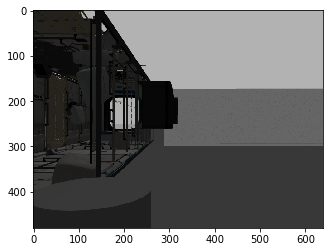

In [ ]:
image=rgbd.get_image()
plt.imshow(image)

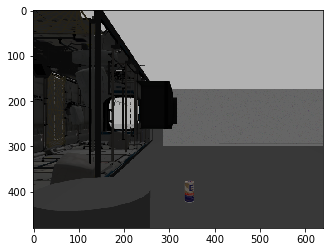

In [ ]:
image=rgbd.get_image()
plt.imshow(image)

(480, 640)

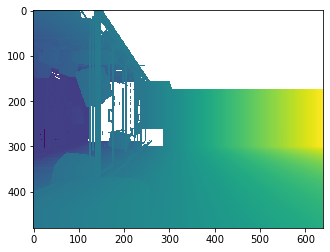

In [ ]:
points=rgbd.get_points()
plt.imshow(points['x'])  #Información de nube de puntos en una imagen
#no es fácil de ver..... 
# rango dinámico de la "imágen"

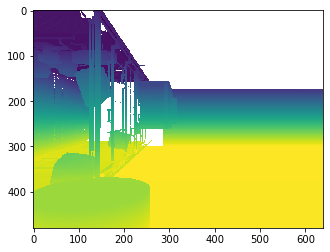

In [ ]:
points=rgbd.get_points()
plt.imshow(points['y'])  #Información de nube de puntos en una imagen
#no es fácil de ver..... 
# rango dinámico de la "imágen"

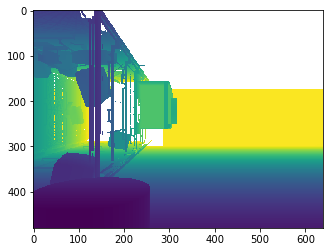

In [ ]:
points=rgbd.get_points()
plt.imshow(points['z'])  #Información de nube de puntos en una imagen
#no es fácil de ver..... 
# rango dinámico de la "imágen"

Sugerencia, utilizar un mapa de colores para hacer más sentido de lo que se despliega. Por ejemplo 

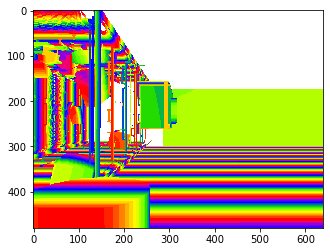

In [ ]:
points=rgbd.get_points()

plt.imshow(points['z'],cmap='prism') #color sintético para apreciar 

A continuación se utiliza el algortimo SHI TOMASI para extrer "esquinas" de la imagen. Una posible solución al reto anterior, y un buen "extractor de características en la imagen"

In [ ]:
import cv2

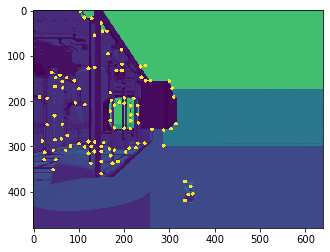

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
radius = 4
num_corners=100
corners=cv2.goodFeaturesToTrack(gray,num_corners,.01,10)
for i in range(corners.shape[0]):
    
    #cv2.circle()
    cv2.circle(gray, ((int)(corners[i,0,0]), (int)(corners[i,0,1])), radius, (255,255,255), cv2.FILLED)
plt.imshow(gray)

TAREA:Mueva al robot y compare el vector de caracterisiticas "corners" compuesto de las 100 "más" esquinas obtenido del ejemplo anterior 

Busque y compare al menos un algortimo más dentro de la librería opencv

Encuentre líneas,  encuentre objetos de un color específico


##Prueba anterior, busquemos como se vería un cubo en el ejemplo shi tomasi
### 

PRUEBA: EL robot (que siempre parte de la misma posición inicial) debe ir y venir a alguno de los cubos del mapa. 
Puntos Penalización:

Coalisiones de cualquier tipo contribuyen a +3 sec. del recorrido total

Al final el equipo que más se acerque (sin chocar al cubo ) "primer distancia"
y después al punto de partida  "segunda distancia"  en el menor tiempo gana.



puntos extra: -30 segundos del tiempo total.
El robot debe proveer pruebas de qe encontró un objeto con las características de un cubo 
sugerencia, capturar en una variable "prueba_de_cubo" las lecturas del sensor laser.

La presencia de una esquina de 90 grados podría ser una excelente forma de encontrar cubos 



In [ ]:
def get_100_corners(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    radius = 4
    num_corners=100
    corners=cv2.goodFeaturesToTrack(gray,num_corners,.01,10)
    for i in range(corners.shape[0]):

        #cv2.circle()
        cv2.circle(gray, ((int)(corners[i,0,0]), (int)(corners[i,0,1])), radius, (255,255,255), cv2.FILLED)
    return(gray)

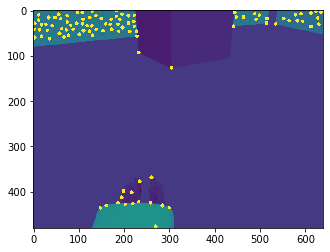

In [ ]:
image=rgbd.get_image()
corners_displayed= get_100_corners(image)
plt.imshow(corners_displayed)

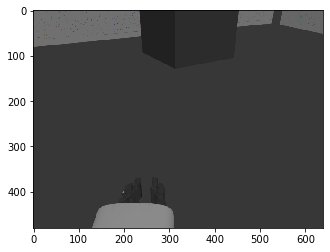

In [ ]:
plt.imshow(rgbd.get_image())

In [ ]:
## Prueba:: 